In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random



# Explore the normal dataset
There are 49 sequences without any fault, each with a fixed rotation speed within the range from 737 rpm to 3686 rpm with steps of approximately 60 rpm.

Each sequence was generated at a 50 kHz sampling rate during 5 s, totaling 250.000 samples.

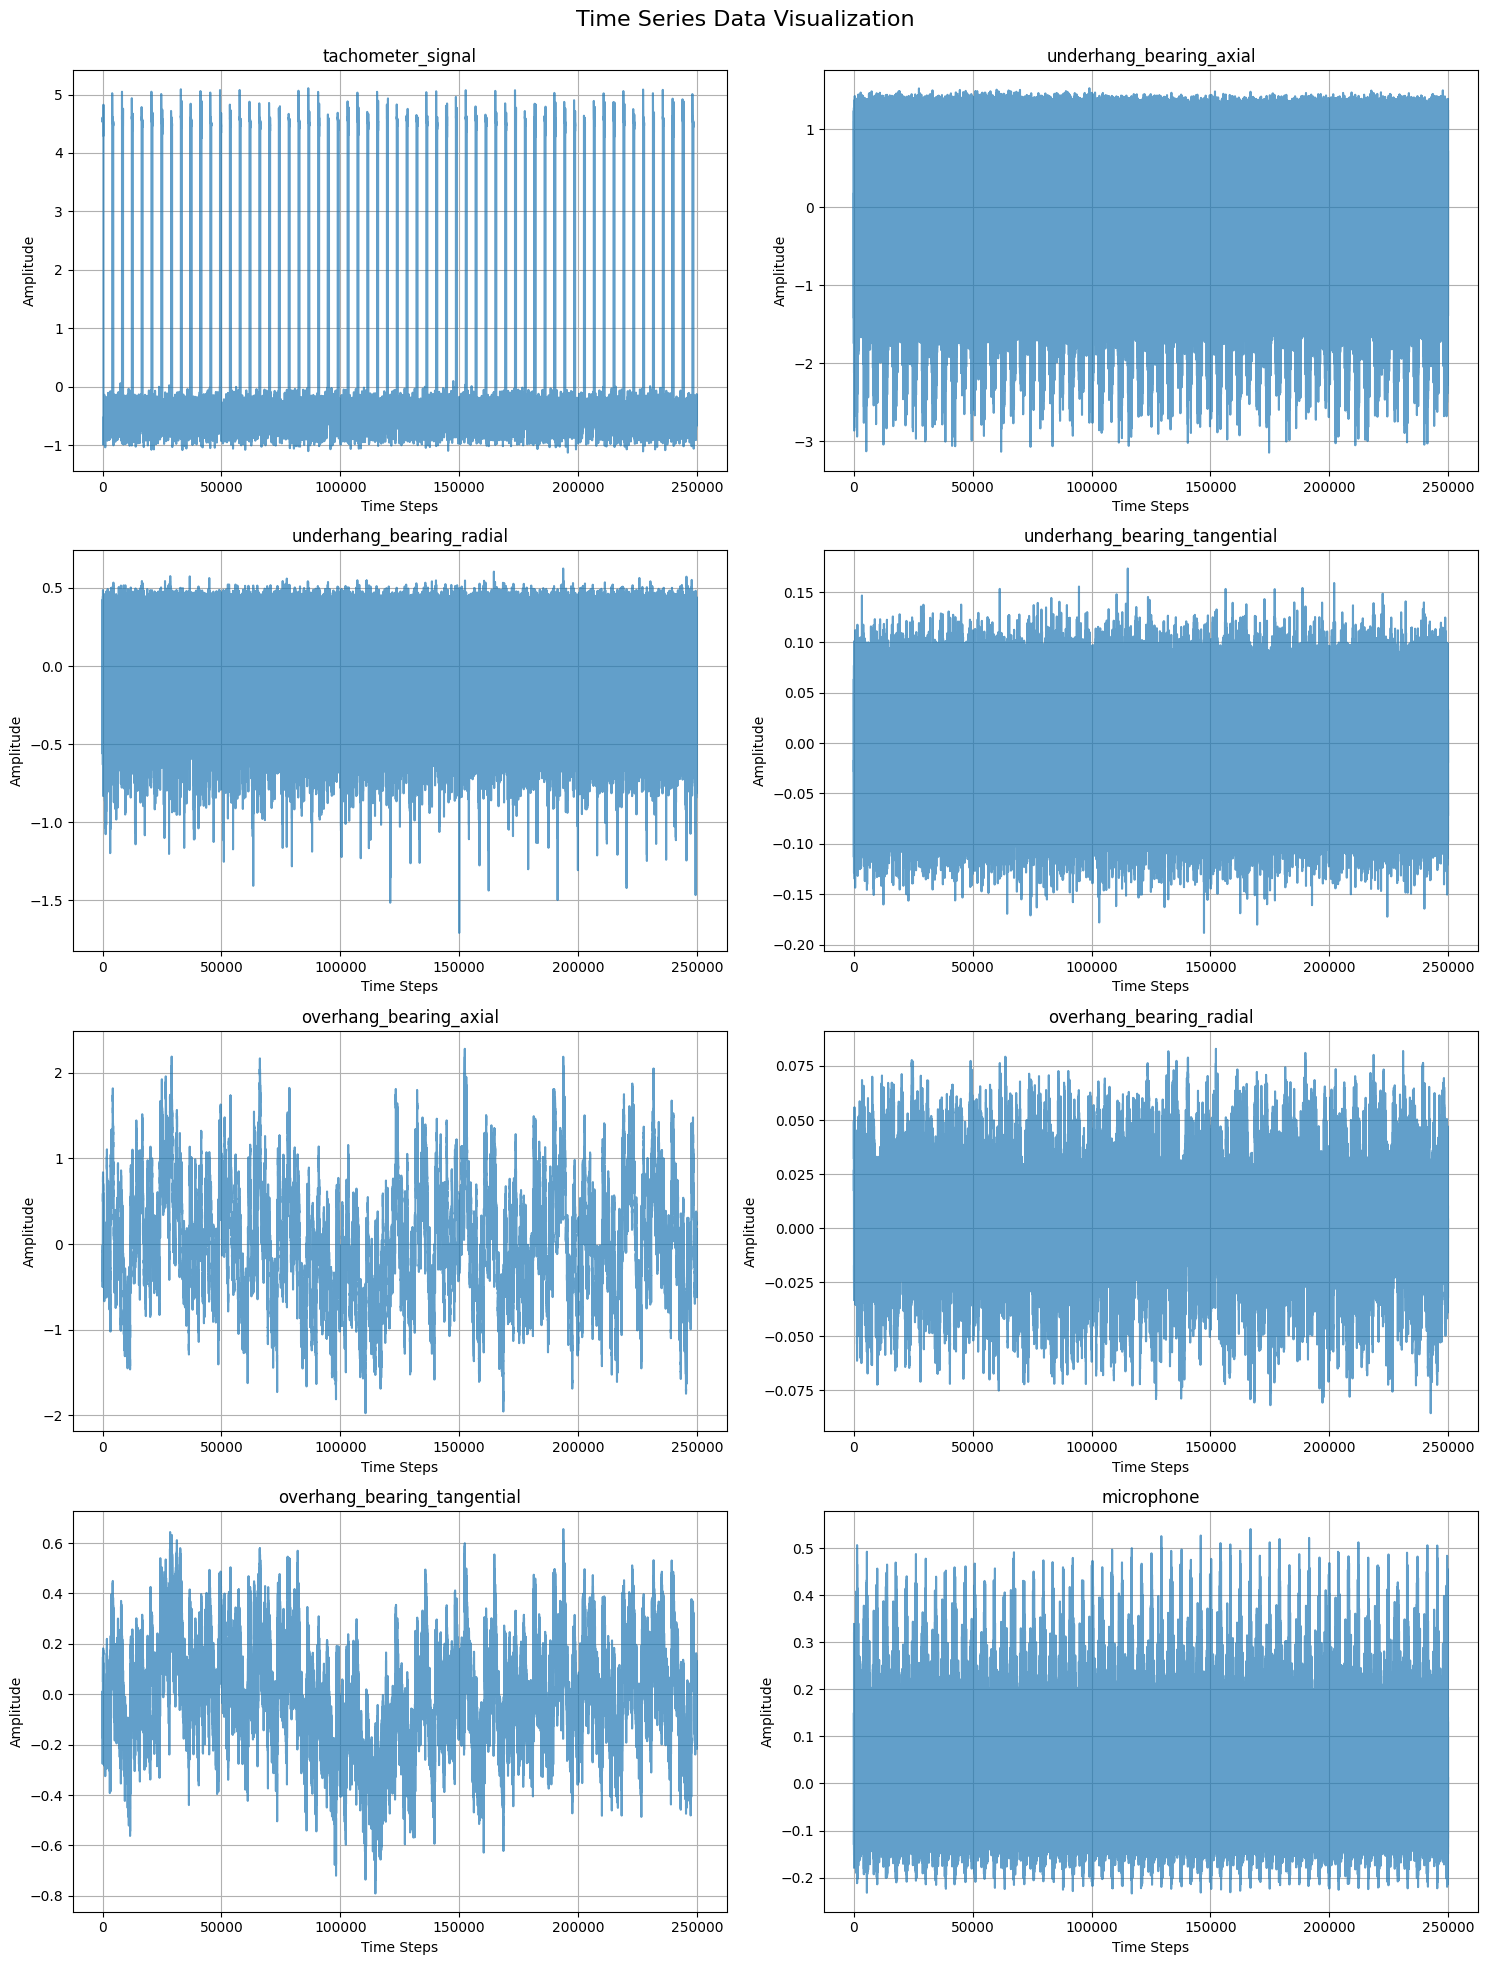

In [2]:
column_names = [
    'tachometer_signal',  # Column 1
    'underhang_bearing_axial', 'underhang_bearing_radial', 'underhang_bearing_tangential',  # Columns 2 to 4
    'overhang_bearing_axial', 'overhang_bearing_radial', 'overhang_bearing_tangential',  # Columns 5 to 7
    'microphone'  # Column 8
]

# Load CSV file into a DataFrame
df = pd.read_csv('./data/normal/50KHz/12.288.csv', header=None) # 12.288 is the first sequence (lowest rpm)
df_last = pd.read_csv('./data/normal/50KHz/61.44.csv', header=None) # 61.44 is the last sequence (highest rpm) 

df.columns = column_names
df_last.columns = column_names

# Create subplots for each column
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Time Series Data Visualization', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each column
for idx, column in enumerate(df.columns):
    axes[idx].plot(df[column], alpha=0.7)
    axes[idx].set_title(f'{column}')
    axes[idx].set_xlabel('Time Steps')
    axes[idx].set_ylabel('Amplitude')
    axes[idx].grid(True)

# Remove empty subplot if number of columns is odd
if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)


## How can we choose an appropriate window size for a model?
We can use the fourier transform to see the frequency content of the signal to make sure we don't make the window too small

We can check for seasonal components in the signal and auto-correlation in the signal to make sure are capturing any repeating patterns.

We may also want to downsample the signal to reduce the number of features, but also making it more reflective of low sampling frequency signals.


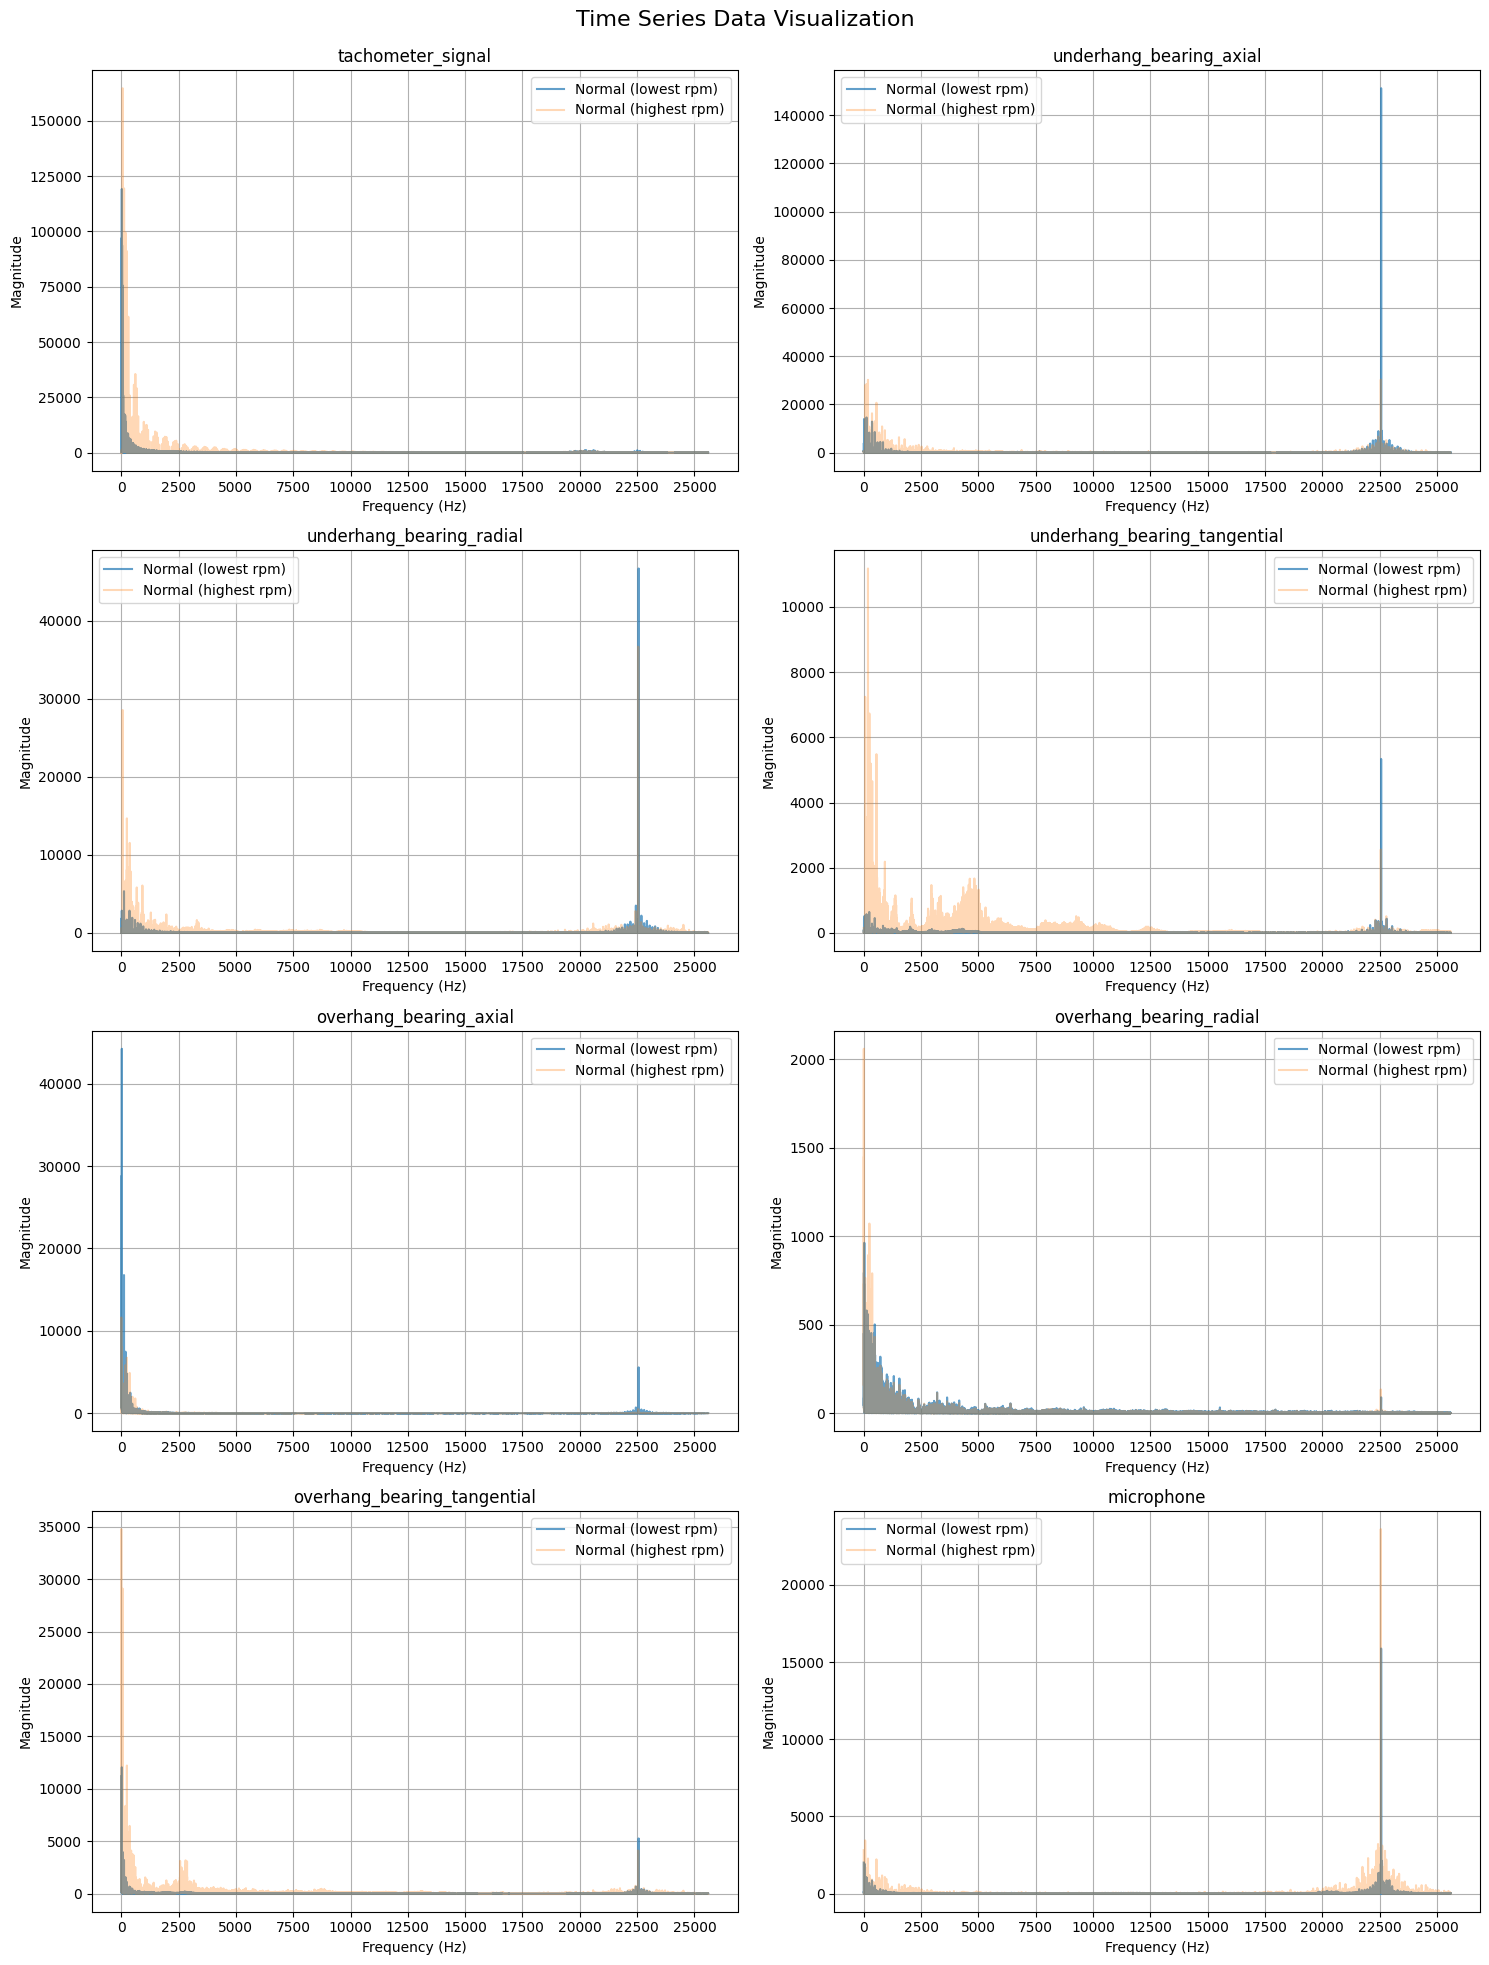

In [4]:
f = 51200 # Hz sampling frequency
T = 1/f # Sampling period

# Create subplots for each column
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Time Series Data Visualization', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each column
for idx, column in enumerate(df.columns):
    fourier = np.fft.fft(df[column])
    fourier_last = np.fft.fft(df_last[column])
    n = df[column].size
    n_last = df_last[column].size
    freq = np.fft.fftfreq(n, d=T)
    freq_last = np.fft.fftfreq(n_last, d=T) 
    axes[idx].plot(freq[:n//2], np.abs(fourier)[:n//2], alpha=0.7)
    axes[idx].plot(freq_last[:n_last//2], np.abs(fourier_last)[:n_last//2], alpha=0.3)
    axes[idx].set_title(f'{column}')
    axes[idx].set_xlabel('Frequency (Hz)')
    axes[idx].set_ylabel('Magnitude')
    axes[idx].grid(True)
    axes[idx].xaxis.set_major_locator(plt.MaxNLocator(12)) # Adjust 20 to desired number of ticks
    axes[idx].legend(['Normal (lowest rpm)', 'Normal (highest rpm)'])



# Remove empty subplot if number of columns is odd
if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)

## Observations: 
- frequncy spectra show spikes at 22500 Hz (half of the sampling frequency)and a low frequncy component mostly in the 0 - 1 kHz range
- More high frequncy components in the higher rmp sequence
- Could focus on the 0 - 1 kHz range for downsampling
- However, due to the constraints of the application within a low cost system, we will want to focus predominantly on the low frequncy components.



### Downsampling
We can downsample the signal to reduce the number of features, but also making it more reflective of low sampling frequency signals.

We can use the fourier transform to see the frequency content of the signal to make sure we don't make the window too small



In [4]:
def downsample_csv(name, current_freq, desired_freq):
    path = f'./data/normal/50KHz/{name}'
    # Load CSV file into a DataFrame
    df = pd.read_csv(path, header=None)
    print(f'original size: {df.shape}')
    column_names = [
        'tachometer_signal',  # Column 1
        'underhang_bearing_axial', 'underhang_bearing_radial', 'underhang_bearing_tangential',  # Columns 2 to 4
        'overhang_bearing_axial', 'overhang_bearing_radial', 'overhang_bearing_tangential',  # Columns 5 to 7
        'microphone'  # Column 8
    ]
    df.columns = column_names
    ratio = int(current_freq/desired_freq)
    downsampled_df = df.iloc[::ratio]
    # print(downsampled_df.head())
    print(f'new size: {downsampled_df.shape}')
    downsampled_df.to_csv(f'./data/normal/{desired_freq}Hz/{name}', index=False)

file_names = os.listdir('./data/normal/50KHz')

for file in file_names:
    downsample_csv(file, 51200, 500)



original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size: (250000, 8)
new size: (2451, 8)
original size

### Now we can look at the downsampled data

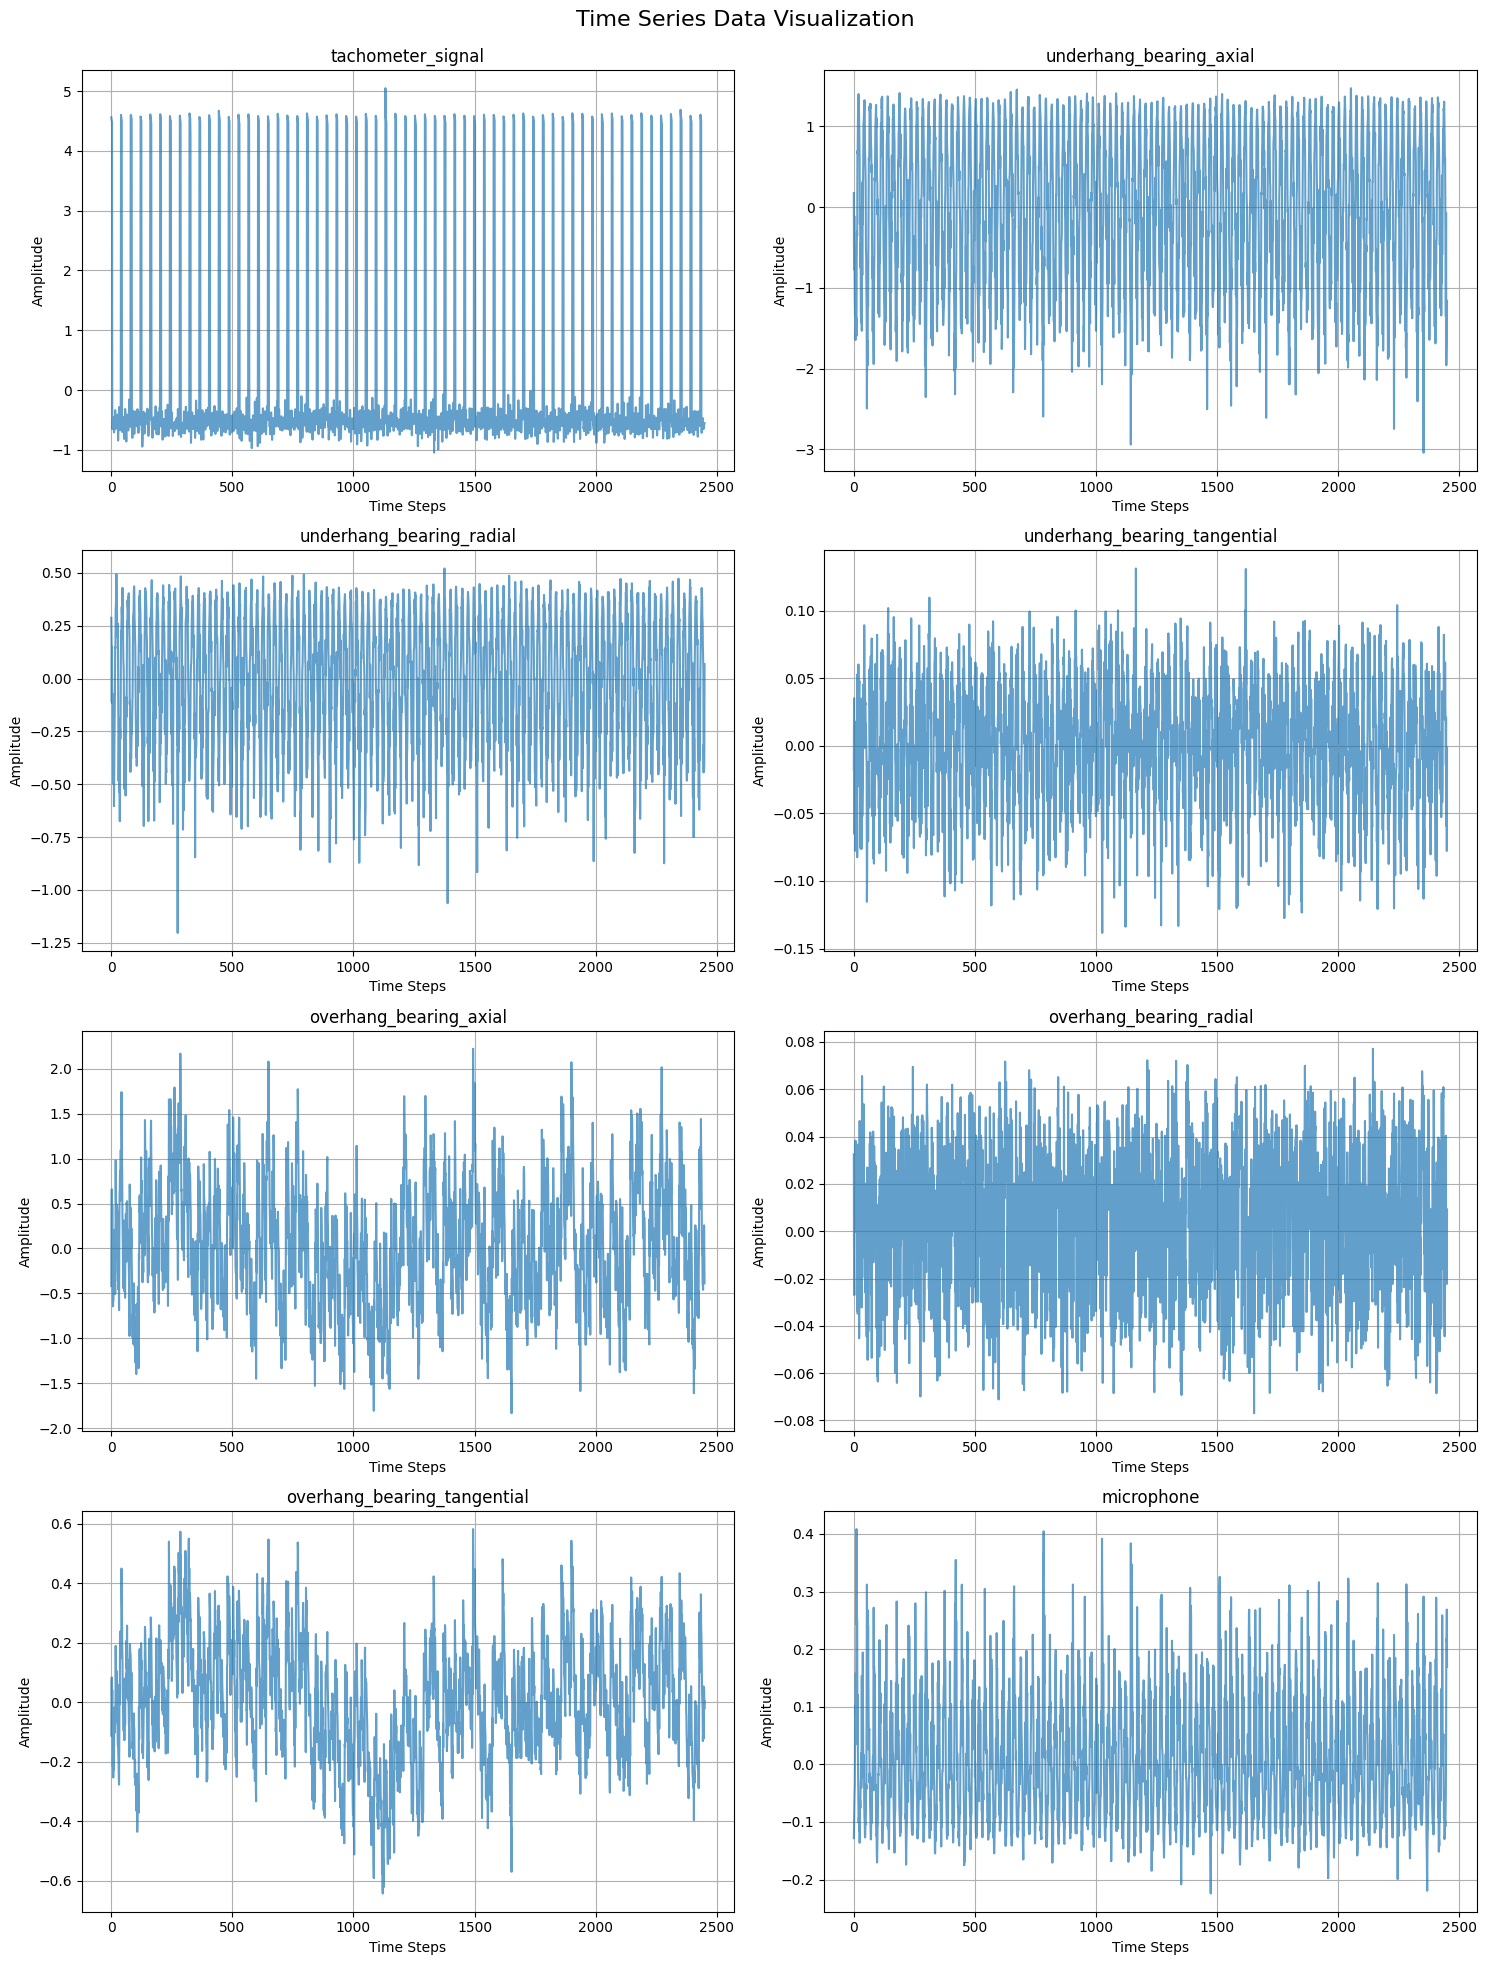

In [14]:

# Load CSV file into a DataFrame
df_500 = pd.read_csv('./data/normal/500Hz/12.288.csv', header=0) # 12.288 is the first sequence (lowest rpm)
df_500_last = pd.read_csv('./data/normal/500Hz/61.44.csv', header=0) # 61.44 is the last sequence (highest rpm) 

df_500.columns = column_names
df_500_last.columns = column_names

# Create subplots for each column
fig2, axes2 = plt.subplots(4, 2, figsize=(15, 20))
fig2.suptitle('Time Series Data Visualization', fontsize=16)

# Flatten axes for easier iteration
axes2 = axes2.flatten()

# Plot each column
for idx, column in enumerate(df_500.columns):
    axes2[idx].plot(df_500[column], alpha=0.7)
    # axes2[idx].plot(df_500_last[column], alpha=0.7)
    axes2[idx].set_title(f'{column}')
    axes2[idx].set_xlabel('Time Steps')
    axes2[idx].set_ylabel('Amplitude')
    axes2[idx].grid(True)

# Remove empty subplot if number of columns is odd
if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)


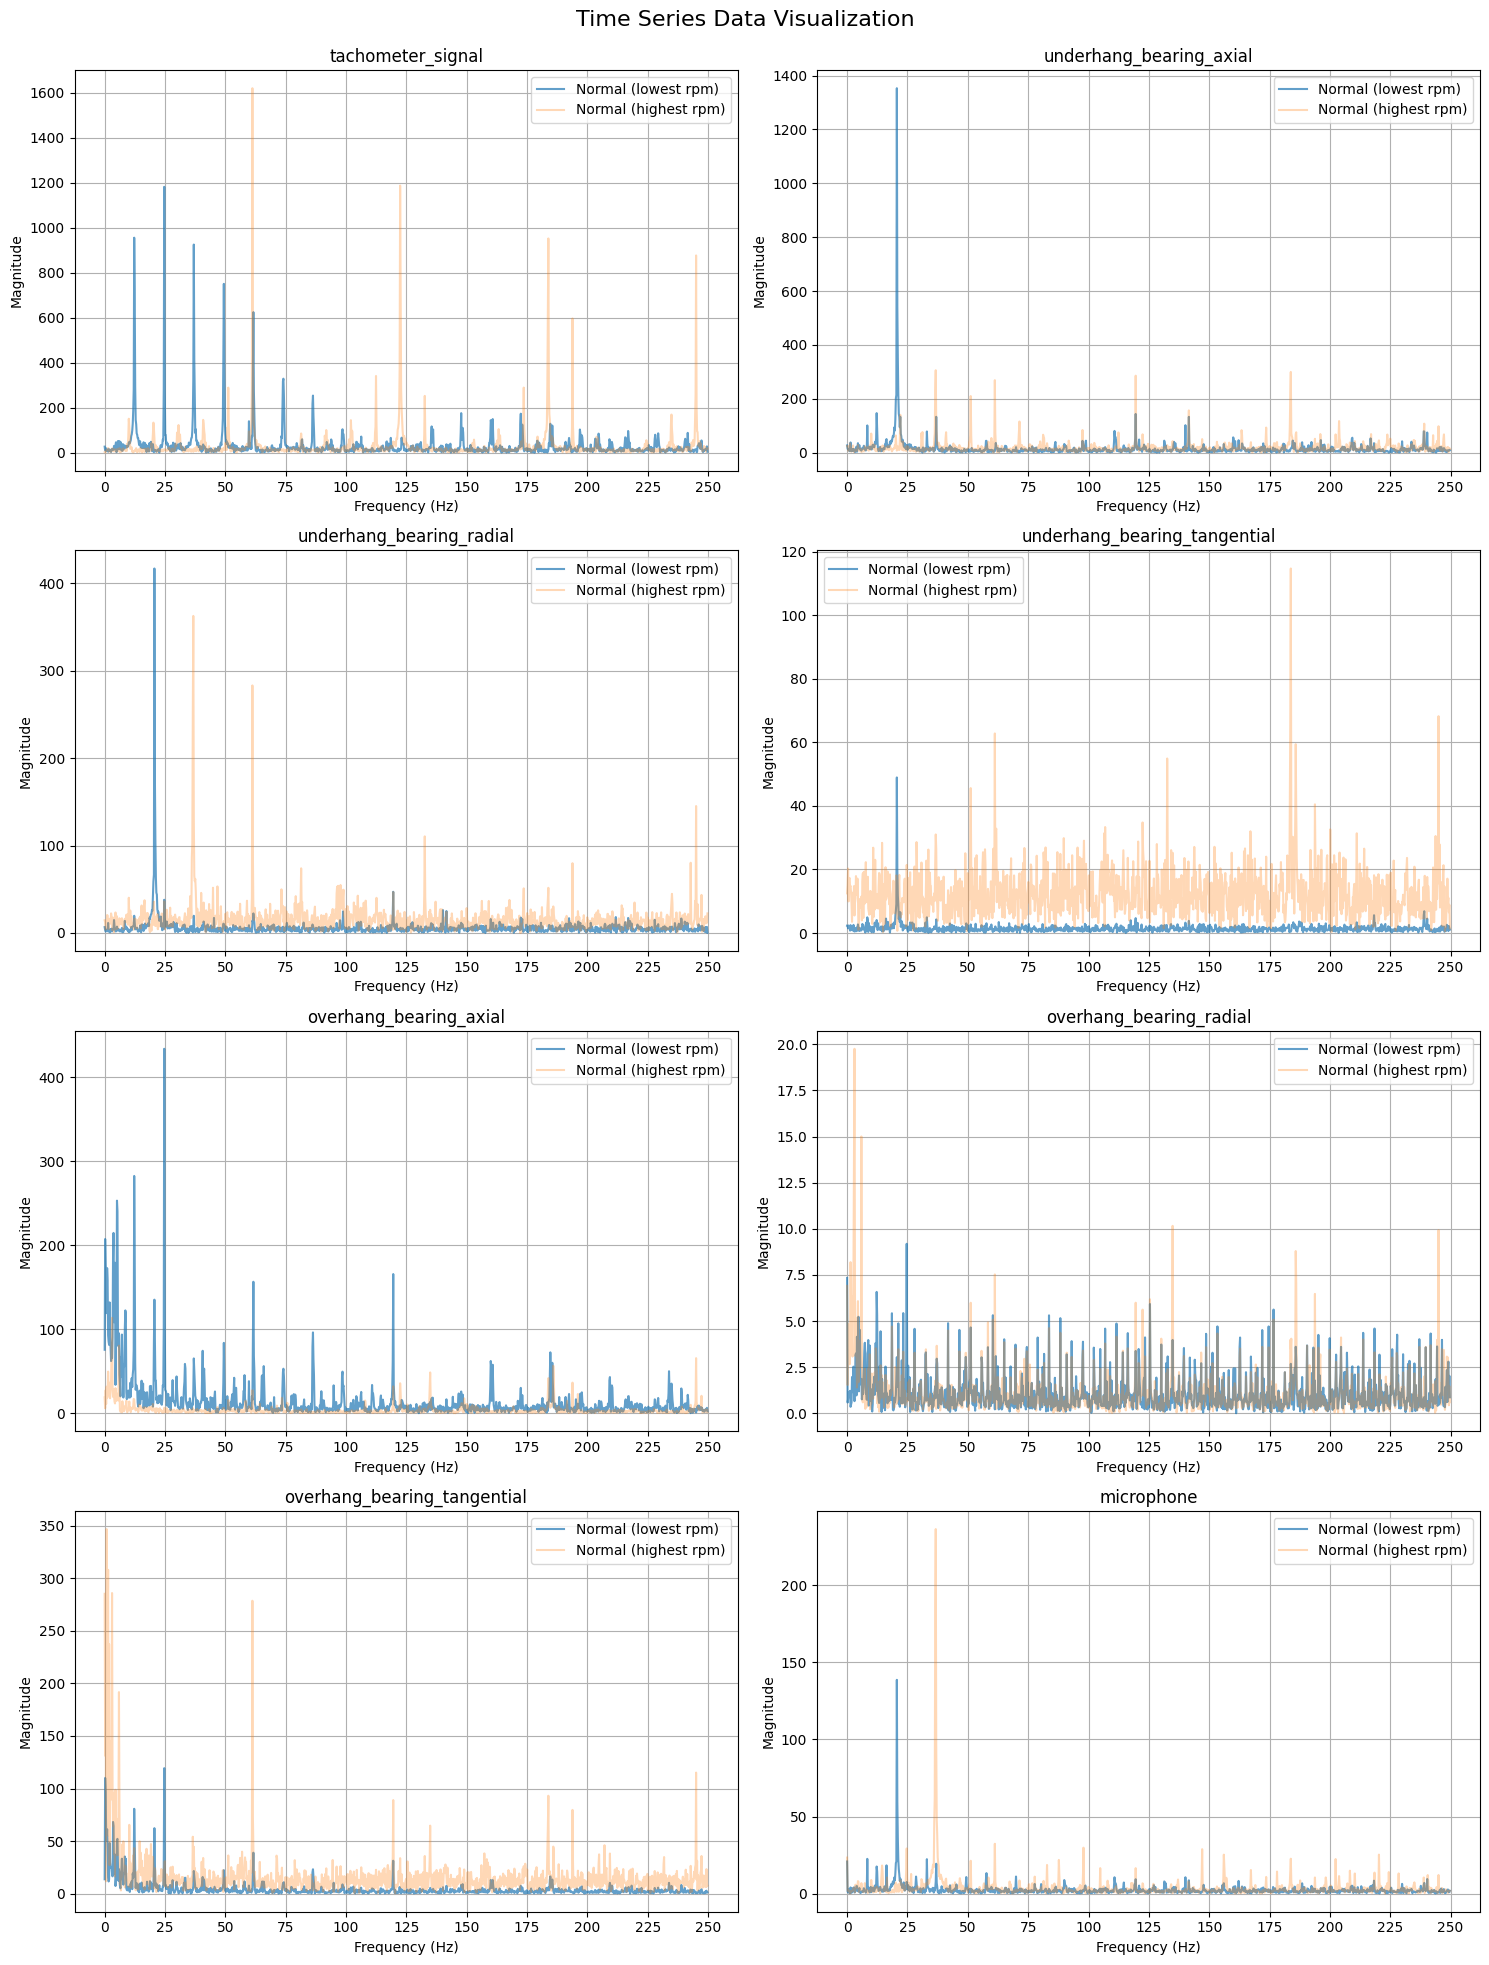

In [17]:
f = 500 # Hz sampling frequency
T = 1/f # Sampling period

# Create subplots for each column
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Time Series Data Visualization', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each column
for idx, column in enumerate(df_500.columns):
    fourier = np.fft.fft(df_500[column])
    fourier_last = np.fft.fft(df_500_last[column])
    n = df_500[column].size
    n_last = df_500_last[column].size
    freq = np.fft.fftfreq(n, d=T)
    freq_last = np.fft.fftfreq(n_last, d=T) 
    axes[idx].plot(freq[:n//2], np.abs(fourier)[:n//2], alpha=0.7)
    axes[idx].plot(freq_last[:n_last//2], np.abs(fourier_last)[:n_last//2], alpha=0.3)
    axes[idx].set_title(f'{column}')
    axes[idx].set_xlabel('Frequency (Hz)')
    axes[idx].set_ylabel('Magnitude')
    axes[idx].grid(True)
    axes[idx].xaxis.set_major_locator(plt.MaxNLocator(12)) # Adjust 20 to desired number of ticks
    axes[idx].legend(['Normal (lowest rpm)', 'Normal (highest rpm)'])



# Remove empty subplot if number of columns is odd
if len(df.columns) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)

### Having a look at the fault data
I have focused on bearing faults as these are the most common type of fault in rotating machinery.

 The ABVT manufacturer provided three defective bearing, each one with a distinct defective element (outer track, rolling elements, and inner track), that were placed one at a time in two different positions in the MFS experimental stand: between the rotor and the motor (underhang position), or in the external position, having the rotor between the bearing and the motor (overhang position). Bearing faults are practically imperceptible when there is no imbalance. So, three masses of 6 g, 20 g, and 35 g were added to induce a detectable effect, with different rotation frequencies as before.


Underhang & Overhang position

Cage fault	

Outer race	

Ball fault



### Splitting the data into training and testing 

I have decided to split the normal data into train, validation and test sets.

I will split each 5s sequence into 3 x 1s training samples, 1s validation and 1s test. This will give me 150 training samples, 50 validation samples and 50 test samples.

I will intially use only one parameter, the underhang bearing axial vibration. However, there may be value in combining axial, tangential and radial vibrations together to get total acceleration.

In [17]:
def split_csv(name, target_data_folder):
    path = f'./data/normal/{target_data_folder}/{name}'
    # Load CSV file into a DataFrame
    df = pd.read_csv(path)
    # print(df.head())
    print(f'size: {df.shape}')
    
    # split the data into 5 sections
    chunk_size = len(df) // 5 # 5s sequence split into 5 chunks of 1s
    sections = [df[i:i + chunk_size] for i in range(0, chunk_size*5, chunk_size)]
    
    for i, section in enumerate(sections):
        print(f"Section {i+1} size: {len(section)}")

    # randomly shuffle the sections
    section_indices = list(range(5))
    train_indices = random.sample(section_indices, 3)
    remaining_indices = [i for i in section_indices if i not in train_indices]
    val_index = random.choice(remaining_indices)
    test_index = [i for i in remaining_indices if i != val_index][0]
    
    print(f'train indices: {train_indices}')
    print(f'val index: {val_index}')
    print(f'test index: {test_index}')

    for i in train_indices:
        sections[i].to_csv(f'./data/normal/split/train/{name[0:-4]}_{i+1}.csv', index=False)
    sections[val_index].to_csv(f'./data/normal/split/val/{name[0:-4]}_{val_index+1}.csv', index=False)
    sections[test_index].to_csv(f'./data/normal/split/test/{name[0:-4]}_{test_index+1}.csv', index=False)
    

file_names = os.listdir('./data/normal/500Hz')

# split_csv('12.288.csv', '500Hz')
for file in file_names:
    print(file)
    split_csv(file, '500Hz')

43.6224.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 size: 490
Section 5 size: 490
train indices: [2, 0, 4]
val index: 3
test index: 1
28.8768.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 size: 490
Section 5 size: 490
train indices: [2, 1, 4]
val index: 3
test index: 0
57.9584.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 size: 490
Section 5 size: 490
train indices: [2, 3, 1]
val index: 0
test index: 4
54.6816.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 size: 490
Section 5 size: 490
train indices: [1, 4, 2]
val index: 3
test index: 0
40.3456.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 size: 490
Section 5 size: 490
train indices: [0, 2, 1]
val index: 3
test index: 4
45.4656.csv
size: (2451, 8)
Section 1 size: 490
Section 2 size: 490
Section 3 size: 490
Section 4 si